# Import

In [1]:
import sys
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import tensorflow
import keras
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

print(f"Python version: {sys.version}")
print(f"Tensor Flow Version: {tensorflow.__version__}")
print(f"Tensorflow Keras Version: {tensorflow.keras.__version__}")
print(f"Keras Version: {keras.__version__}")

Python version: 3.7.11 (default, Jul 27 2021, 09:42:29) [MSC v.1916 64 bit (AMD64)]
Tensor Flow Version: 2.0.0
Tensorflow Keras Version: 2.2.4-tf
Keras Version: 2.3.1


Using TensorFlow backend.


# Data Import

In [2]:
np.random.seed(1)
tensorflow.random.set_seed(1)

dataset = tensorflow.keras.datasets.boston_housing
(train_data, train_labels), (test_data, test_labels) = dataset.load_data(seed=1)

atrib = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
dataframe = pd.DataFrame(train_data, columns=atrib)

mean = train_data.mean(axis=0)
std  = train_data.std(axis=0)

train_data = (train_data - mean) / std
test_data  = (test_data  - mean) / std

dataframe.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.00000,404.000000,404.000000,404.000000
mean,3.595577,11.591584,11.035322,0.069307,0.554059,6.310631,68.482426,3.779059,9.623762,409.25495,18.496782,354.071931,12.448812
std,8.524506,23.676616,6.813216,0.254290,0.114267,0.698453,28.114483,2.094428,8.761354,168.28937,2.135036,95.241643,7.123851
min,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.00000,12.600000,0.320000,1.730000
25%,0.081348,0.000000,5.130000,0.000000,0.453000,5.897500,43.250000,2.106075,4.000000,279.00000,17.400000,374.052500,6.745000
50%,0.250895,0.000000,8.560000,0.000000,0.535000,6.243500,76.950000,3.167500,5.000000,334.00000,19.100000,391.190000,10.805000
75%,3.681942,12.500000,18.100000,0.000000,0.624000,6.630250,94.100000,5.116700,24.000000,666.00000,20.200000,395.962500,16.672500
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.00000,22.000000,396.900000,37.970000


# Funções

In [3]:

def build_model(inodes):
    model = Sequential([Dense(32, activation=tensorflow.nn.relu, input_shape=(inodes,)), Dense(32, activation=tensorflow.nn.relu), Dense(1)])
    optimizer = tensorflow.keras.optimizers.RMSprop(learning_rate=0.002)
    model.compile(loss='mse', optimizer=optimizer, metrics=['mae'])
    return model

def plot_history(history):
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Absolute Error [$1000]')

    plt.plot(history.epoch, np.array(history.history['mae']), 'b-', label='Mean Absolute Error',)
    plt.plot(history.epoch, np.array(history.history['val_mae']), 'r-' , label='Validation MAE')

    plt.legend()
    plt.title('Erro médio absoluto da rede neural')
    plt.ylim([0, 5])
    plt.show()

class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: print('') #'\n'
        print('.', end='')

def plot_predictions(label, predictions):
    plt.subplots(figsize=(5, 5))
    plt.scatter(label, predictions)
    plt.xlabel('True values [$1000]')
    plt.ylabel('Predictions [$1000]')
    plt.title('Comparação entre os valores originais e os escolhidos pela rede neural')
    plt.axis('equal')
    plt.show()

# Parte 1

## Neural Network

### Treinamento

In [4]:
# Treinamento da rede
maelist = []
for i in range(train_data.shape[1]):
    print(f'Atributo: {i+1} ')
    model = build_model(1)
    model.fit(train_data[:, i].T, train_labels, epochs=600, batch_size=32, validation_split=0.2, verbose=0, callbacks=[PrintDot()])
    #Utilização do métodno numpy.transpose(.T) para o correto uso dos dados
    mae = model.evaluate(test_data[:, i].T, test_labels, verbose=0) 

    maelist.append(mae)

    del model
    keras.backend.clear_session() # IMPRESCINDÍVEL neste caso, pois faz a remoção dos MODELOS anteriores.

    print('\n')


Atributo: 1 

....................................................................................................
....................

Exception ignored in: <function IteratorResourceDeleter.__del__ at 0x000001E2BE704D38>
Traceback (most recent call last):
  File "C:\Users\felip\miniconda3\envs\tensorflow\lib\site-packages\tensorflow_core\python\data\ops\iterator_ops.py", line 537, in __del__
    handle=self._handle, deleter=self._deleter)
  File "C:\Users\felip\miniconda3\envs\tensorflow\lib\site-packages\tensorflow_core\python\ops\gen_dataset_ops.py", line 1140, in delete_iterator
    deleter)
KeyboardInterrupt: 


................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................

Atributo: 2 

...........................................................................................

### Erro médio absoluto dos atributos

In [ ]:
atrib = np.asarray(atrib)
for i in range(atrib.size):
    print(f"Atributo {atrib[i]} tem como erro médio absoluto: ${maelist[i][1] * 1000: .2f}.")

Atributo CRIM tem como erro médio absoluto: $ 6319.80.
Atributo ZN tem como erro médio absoluto: $ 6111.69.
Atributo INDUS tem como erro médio absoluto: $ 5318.15.
Atributo CHAS tem como erro médio absoluto: $ 6963.30.
Atributo NOX tem como erro médio absoluto: $ 5758.74.
Atributo RM tem como erro médio absoluto: $ 3795.45.
Atributo AGE tem como erro médio absoluto: $ 6217.83.
Atributo DIS tem como erro médio absoluto: $ 6320.66.
Atributo RAD tem como erro médio absoluto: $ 6523.87.
Atributo TAX tem como erro médio absoluto: $ 6129.94.
Atributo PTRATIO tem como erro médio absoluto: $ 5848.00.
Atributo B tem como erro médio absoluto: $ 6800.69.
Atributo LSTAT tem como erro médio absoluto: $ 3863.98.


# Parte 2

### BEST Data

In [ ]:
maelist = np.array(maelist)
BEST_index = np.argsort(maelist[:, 1])[:5] #Índice dos 5 menores EMA
BEST_train = []
BEST_test = []

for i in range(5):
    print(f"Rank {i+1}: {atrib[BEST_index[i]]}")

    BEST_data = train_data[:, BEST_index[i]]
    BEST_test_data = test_data[:, BEST_index[i]]

    BEST_train.append(BEST_data)
    BEST_test.append(BEST_test_data)

BEST_train = np.array(BEST_train)
BEST_train = BEST_train.T

BEST_test = np.array(BEST_test)
BEST_test = BEST_test.T

Rank 1: RM
Rank 2: LSTAT
Rank 3: INDUS
Rank 4: NOX
Rank 5: PTRATIO


### Neural Network

In [ ]:
model_BEST = build_model(BEST_train.shape[1]) #Função de definição da rede
BESThistory = model_BEST.fit(BEST_train, train_labels, epochs=600, batch_size=32, validation_split=0.2, verbose=0, callbacks=[PrintDot()]) #Treinamento


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................

O erro médio absoluto em relação aos preços originais da casa é: $2719.14


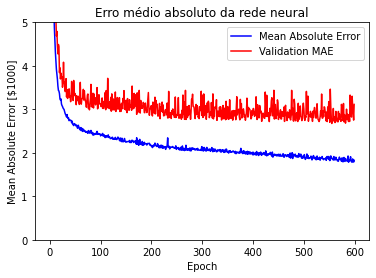

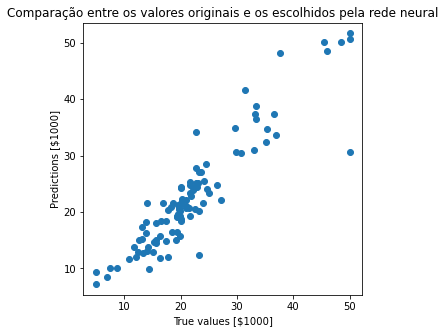

In [ ]:
mae = model_BEST.evaluate(BEST_test, test_labels, verbose=0)[1]
print("O erro médio absoluto em relação aos preços originais da casa é: ${:5.2f}".format(mae * 1000))

plot_history(BESThistory)

predictions = model_BEST.predict(BEST_test).flatten()

def plot_predictions(label, predictions):
    plt.subplots(figsize=(5, 5))
    plt.scatter(label, predictions)
    plt.xlabel('True values [$1000]')
    plt.ylabel('Predictions [$1000]')
    plt.title('Comparação entre os valores originais e os escolhidos pela rede neural')
    plt.axis('equal')
    plt.show()

plot_predictions(test_labels, predictions)
keras.backend.clear_session()

#Resultados melhores foram obtidos com a utilização do otimizador 'rmsprop' sem a especificação da taxa de aprendizado.

# Parte 3

### RANDOM Data

In [ ]:
# ATRIBUTOS UTILIZADOS: RM, AGE, DIS, TAX, LSTAT -> 5, 6, 7, 8, 12 
RANDOM_train = np.append(train_data[:, 5:9], train_data[:, 12].reshape(train_data.shape[0], 1), axis=1)
RANDOM_test  = np.append(test_data[:, 5:9], test_data[:, 12].reshape(test_data.shape[0], 1), axis=1)

RANDOMatrib = ['RM', 'AGE', 'DIS', 'RAD', 'LSTAT']
RANDOMdataframe = pd.DataFrame(RANDOM_train, columns=RANDOMatrib)

RANDOMdataframe

,RM,AGE,DIS,RAD,LSTAT
0,0.771758,0.064729,-0.285089,-0.299841,-0.691327
1,0.552431,-0.430291,0.933650,-0.528400,-0.740519
2,-0.402288,0.606046,0.913237,-0.756958,0.892644
3,-0.620182,-1.676745,1.299788,-0.642679,-0.611215
4,-1.359874,0.987105,-0.800952,1.642904,-0.317471
...,...,...,...,...,...
399,0.533795,1.008473,-1.158007,1.642904,-1.225408
400,0.093707,-0.505078,0.363958,-0.528400,-0.784088
401,0.361774,0.965737,-0.445570,-0.756958,-0.951340
402,-1.299667,1.122434,-1.045713,-0.528400,0.116821


### Neural Network

In [ ]:
model_RANDOM = build_model(RANDOM_train.shape[1])
RANDOMhistory = model_RANDOM.fit(RANDOM_train, train_labels, epochs=600, batch_size=32, validation_split=0.2, verbose=0, callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................

O erro médio absoluto em relação aos preços originais da casa é: $2624.41


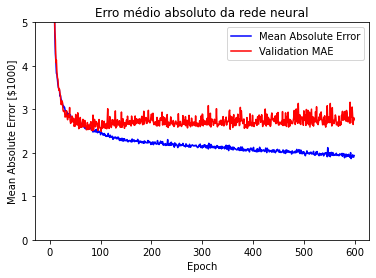

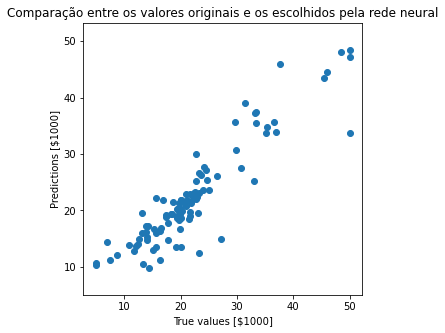

In [ ]:
mae = model_RANDOM.evaluate(RANDOM_test, test_labels, verbose=0)[1]
print("O erro médio absoluto em relação aos preços originais da casa é: ${:5.2f}".format(mae * 1000))

plot_history(RANDOMhistory)

predictions = model_RANDOM.predict(RANDOM_test).flatten()
plot_predictions(test_labels, predictions)

keras.backend.clear_session()
